<a href="https://colab.research.google.com/github/AlexTran1703/Intro_Machine_Learning/blob/Lab1_Intro-to-Google-Colab/Lab1_pro5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


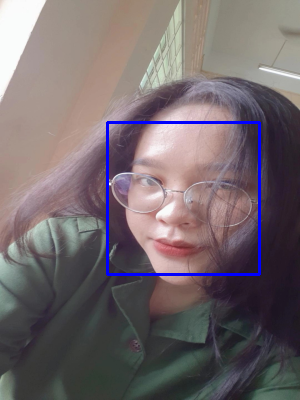

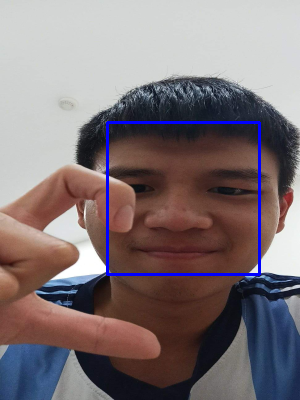

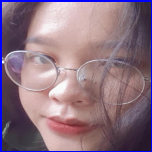

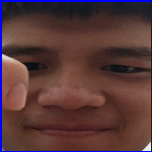

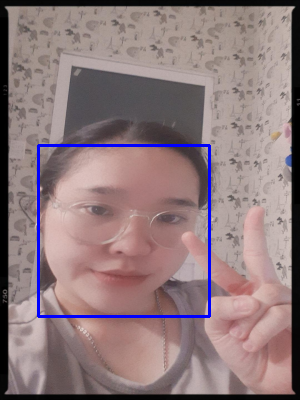

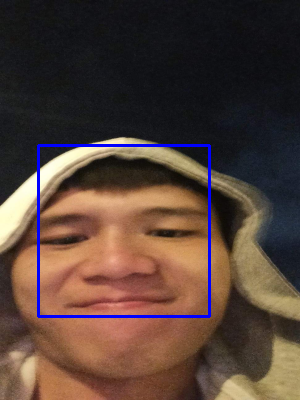

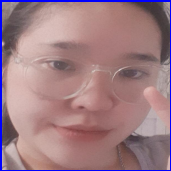

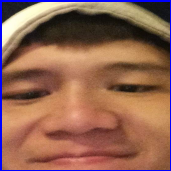

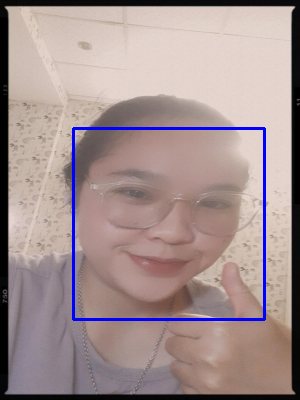

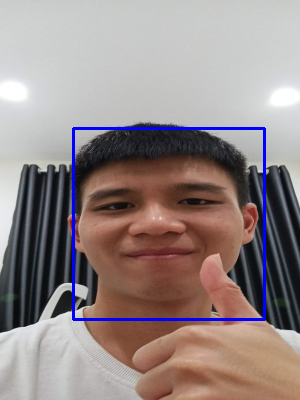

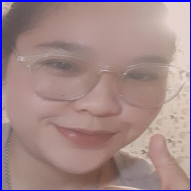

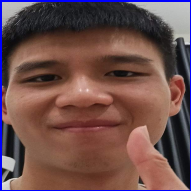

corr1 = 0.2317470937542222
corr2 = 0.33589211517761325
corr3 = 0.4536965430764538
np.cof1 = 0.23174709375422267
np.cof2 = 0.3358921151776136
np.cof3 = 0.4536965430764537


In [ ]:
#Lab 1 Problem 5
import cv2
import random
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive 
import math
drive.mount('/content/drive/')

per1_path1 = '/content/drive/MyDrive/Colab Notebooks/Colab_data/Han_1.jpg'
per1_path2 = '/content/drive/MyDrive/Colab Notebooks/Colab_data/Han_2.jpg'
per1_path3 = '/content/drive/MyDrive/Colab Notebooks/Colab_data/Han_3.jpg'

per2_path1 = '/content/drive/MyDrive/Colab Notebooks/Colab_data/Khanh_1.jpg'
per2_path2 = '/content/drive/MyDrive/Colab Notebooks/Colab_data/Khanh_2.jpg'
per2_path3 = '/content/drive/MyDrive/Colab Notebooks/Colab_data/Khanh_3.jpg'
face_reg = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Colab_data/haarcascade_frontalface_default.xml')

#Resize image function
def resize_image(image, width, height):
  # resize image
  resized_image = cv2.resize(image, (width,height), interpolation = cv2.INTER_AREA)
  return resized_image


def corrCoeffi(X, Y) :
  #Get X and Y means
  X_mean = float(np.sum(X))/len(X)
  Y_mean = float(np.sum(Y))/len(Y)

  #Create zeros arrays corresponding to length of arrays X and Y 
  Sum_X = np.zeros(len(X))
  Sum_Y = np.zeros(len(X))
  Sum_XY = np.zeros(len(X))

  for i in range(len(X)):
      Sum_X[i] = float(X[i]) - X_mean
      Sum_Y[i] = float(Y[i]) - Y_mean
      Sum_XY[i] = Sum_X[i]*Sum_Y[i]
  #Compute corroleration Coefficient
  corr = np.sum(Sum_XY)/(math.sqrt(np.sum(Sum_X**2)) * math.sqrt(np.sum(Sum_Y**2)))
  return corr

def face_corr(image1, image2):
  """This function is for face detection of an specific image"""
  #Get a copy of input image
  new_image1 = image1.copy()
  new_image2 = image2.copy()
  # Convert into grayscale
  gray1 = cv2.cvtColor(new_image1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)
  # Detect faces
  faces_crop1 = face_reg.detectMultiScale(gray1, 1.2, 10)
  faces_crop2 = face_reg.detectMultiScale(gray2, 1.2, 10)
  # Draw rectangle around the faces
  for (x, y, w, h) in faces_crop1:
    cv2.rectangle(new_image1, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.rectangle(new_image2, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #Display face dectection image
    cv2_imshow(new_image1)
    cv2_imshow(new_image2)
    #Face crop from the face dectection image
    faces_crop1 = new_image1[y:y + h, x:x + w]
    faces_crop2 = new_image2[y:y + h, x:x + w]

    #Display faces crop
    cv2_imshow(faces_crop1)
    cv2_imshow(faces_crop2)
    #Flatten image into 1-D array
    image1_array = np.asarray(faces_crop1).flatten()
    image2_array = np.asarray(faces_crop2).flatten()

    #Built-in correlation coefficient from numpy
    npcorr = np.corrcoef(image1_array, image2_array)
    #Self made correlation coefficient
    corr = corrCoeffi(image1_array, image2_array)
    #Return value
    return corr, npcorr[0,1]

##Read image 
#Person 1
per1_image1 = cv2.imread(per1_path1)
per1_image2 = cv2.imread(per1_path2)
per1_image3 = cv2.imread(per1_path3)

#Person 2
per2_image1 = cv2.imread(per2_path1)
per2_image2 = cv2.imread(per2_path2)
per2_image3 = cv2.imread(per2_path3)

##Resize image for correlation coefficients computation
#Person 1
per1_new1 = resize_image(per1_image1,300, 400)
per1_new2 = resize_image(per1_image2,300, 400)
per1_new3 = resize_image(per1_image3,300, 400)

#Person 2
per2_new1 = resize_image(per2_image1,300, 400)
per2_new2 = resize_image(per2_image2,300, 400)
per2_new3 = resize_image(per2_image3,300, 400)

##Get correlation coefficients from self made function and built-in function
corr1, npcorr1 = face_corr(per1_new1, per2_new1)
corr2, npcorr2 = face_corr(per1_new2, per2_new2)
corr3, npcorr3 = face_corr(per1_new3, per2_new3)

##Print out result
print(f"corr1 = {corr1}")
print(f"corr2 = {corr2}")
print(f"corr3 = {corr3}")
print(f"np.cof1 = {npcorr1}")
print(f"np.cof2 = {npcorr2}")
print(f"np.cof3 = {npcorr3}")
